# 🏠 House Price Prediction Project

---

**Problem Statement:**
Predict house prices based on property features like Area, Bedrooms, Location, and other related details.

---

**Dataset:** [House Price Prediction Dataset](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

---

**Goals:**
1. Preprocess the dataset (handle missing values, encode categories)
2. Train Linear Regression and Gradient Boosting models
3. Evaluate models using Mean Absolute Error (MAE) and RMSE
4. Visualize actual vs predicted prices to analyze model performance

---



In [1]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


First 5 rows of the dataset:
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renov

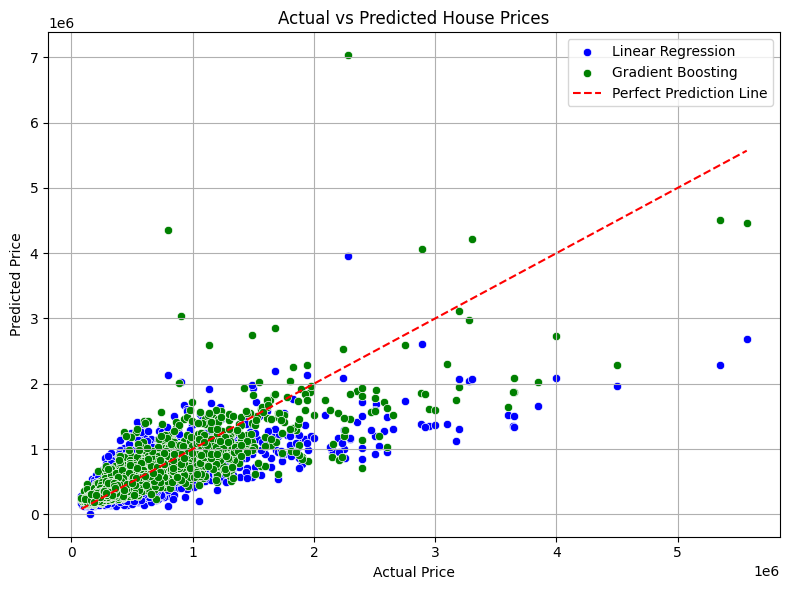

Linear Regression Performance:
Mean Absolute Error (MAE): 172588.66
Root Mean Squared Error (RMSE): 270974.85

Gradient Boosting Performance:
Mean Absolute Error (MAE): 115265.09
Root Mean Squared Error (RMSE): 219132.79



In [6]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 2. Load the dataset
df = pd.read_csv('kc_house_data.csv')  # Make sure the file is available in your directory

# 3. Display basic info
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset summary:")
print(df.info())

# 4. Drop rows with missing values
df = df.dropna()

# 5. Feature selection
features = ['sqft_living', 'bedrooms', 'bathrooms', 'zipcode']
target = 'price'

X = df[features]
y = df[target]

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train models
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

# 8. Visualization for Gradient Boosting predictions
#  Visualize predictions of both models together
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=lr_preds, color='blue', label='Linear Regression')
sns.scatterplot(x=y_test, y=gb_preds, color='green', label='Gradient Boosting')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 9. Evaluation function
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}\n")

# 10. Evaluate both models
evaluate(y_test, lr_preds, "Linear Regression")
evaluate(y_test, gb_preds, "Gradient Boosting")
